In [1]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

print("Feature shape:", X.shape)
print("Target shape:", y.shape)
print("Class labels:", data.target_names)


Feature shape: (569, 30)
Target shape: (569,)
Class labels: ['malignant' 'benign']


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 1: Train/test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Standardize features (zero mean, unit variance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use same scaler for test set

# Optional: Check the results
print("Mean of scaled training features (should be ~0):", X_train_scaled.mean(axis=0)[:5])
print("Std of scaled training features (should be ~1):", X_train_scaled.std(axis=0)[:5])



Mean of scaled training features (should be ~0): [-1.82418183e-15 -3.36348775e-15 -3.60078268e-15 -2.62793450e-16
 -4.26667249e-15]
Std of scaled training features (should be ~1): [1. 1. 1. 1. 1.]


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Fit Logistic Regression model
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=data.target_names)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)


Accuracy: 0.9737
Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



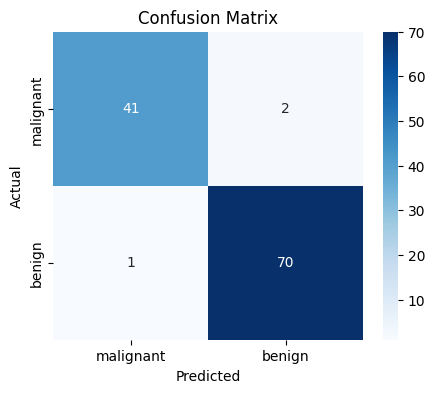

Precision: 0.9722
Recall: 0.9859


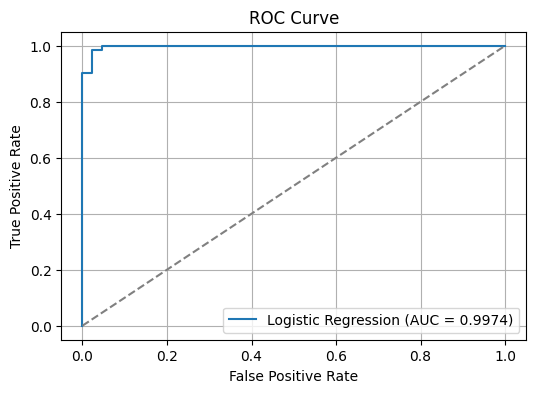

ROC-AUC Score: 0.9974


In [4]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Precision, Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# ROC-AUC Score and ROC Curve
y_proba = model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

print(f"ROC-AUC Score: {roc_auc:.4f}")


In [5]:
import numpy as np

# Get predicted probabilities
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Custom threshold (e.g., 0.3 instead of 0.5)
custom_threshold = 0.3
y_pred_custom = (y_proba >= custom_threshold).astype(int)

# Recalculate evaluation metrics
cm_custom = confusion_matrix(y_test, y_pred_custom)
precision_custom = precision_score(y_test, y_pred_custom)
recall_custom = recall_score(y_test, y_pred_custom)

print(f"Custom Threshold: {custom_threshold}")
print("Confusion Matrix:\n", cm_custom)
print(f"Precision: {precision_custom:.4f}")
print(f"Recall: {recall_custom:.4f}")


Custom Threshold: 0.3
Confusion Matrix:
 [[41  2]
 [ 0 71]]
Precision: 0.9726
Recall: 1.0000
